## RNN con California Housing

## Librerías

In [2]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo de aprendizaje
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing

# Redes neuronales
import tensorflow as tf
from tensorflow import keras
from keras import layers

## Descarga y carga de datos

In [5]:
housing = fetch_california_housing()

X = housing.data
y = housing.target

feature_names = housing.feature_names

## Crear un DF

In [12]:
df = pd.DataFrame(X, columns=feature_names)

df['Price'] = y

## Primera Exploración

In [11]:
print(f"Tamaño del dataset {df.shape}")
print("\nInformación de las columnas:")
print(df.info())
print("\nEstadísticas descriptivas")
print(df.describe())

Tamaño del dataset (20640, 9)

Información de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Estadísticas descriptivas
             MedInc      HouseAge  ...     Longitude        target
count  20640.000000  20640.000000  ...  20640.000000  20640.000000
mean       3.870671     28.639486  ...   -119.569704      2.068558
std        1.899822     12.585558  ...      2.003532      1.153956
min        0.499900      1.000000  ...   

In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Text(0, 0.5, 'Frecuencia')

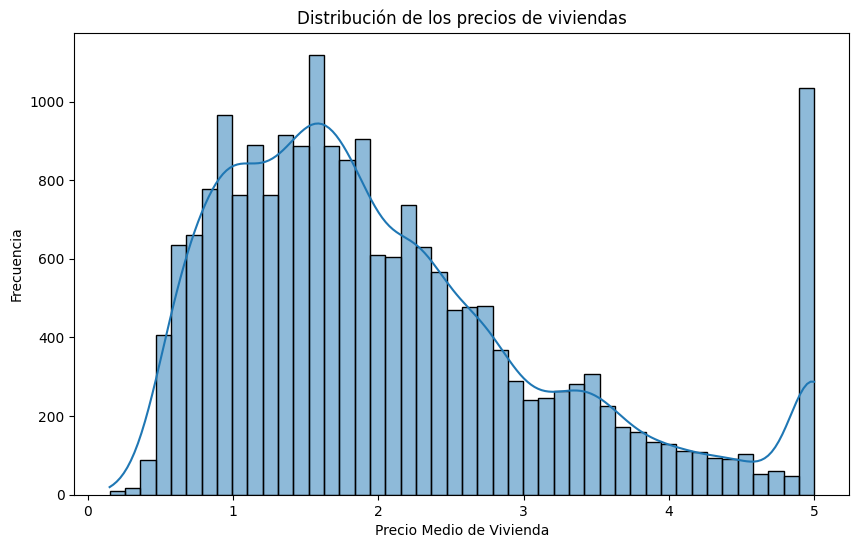

In [ ]:
# Visualización de la distribución de precios

plt.figure(figsize=(10,6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribución de los precios de viviendas')
plt.xlabel('Precio Medio de Vivienda')
plt.ylabel('Frecuencia')

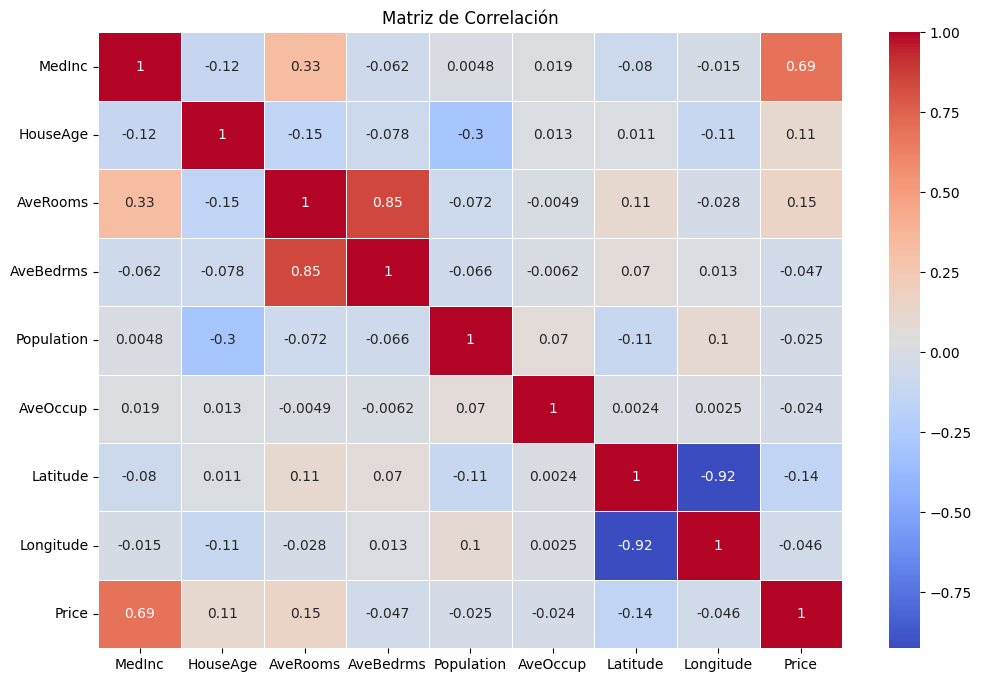

In [19]:
# Matriz de correlación
plt.figure(figsize=(12,8))
correlacion_matrix = df.corr()
sns.heatmap(correlacion_matrix, annot=True, cmap="coolwarm", linewidth=0.5)
plt.title("Matriz de Correlación");

In [ ]:
# Visualizaciones de relaciones entre feature y Price

for feature in feature_names:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=df)